<a href="https://colab.research.google.com/github/TatianeIvanof/Bootcamp-Akkadian-Academy/blob/main/An%C3%A1lise_de_Vendas_de_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Carregar os Dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar dados do CSV no Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregar arquivo CSV para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Cópia de arquivo_vendas.csv', sep = ';')

In [ ]:
df.head() # Mostra as primeiras linhas do DataFrame

,Cliende ID,Idade,Item Comprado,Categoria,Valor Compra,Cidade,Método Pagamento
0,1,55,Blusa,Roupas,53,Rio Grande do Norte,Cartão de crédito
1,2,19,Blusão,Roupas,64,Roraima,Dinheiro
2,3,50,Calça jeans,Roupas,73,Piauí,Cartão de crédito
3,4,21,Sandália,Calçados,90,Ceará,Pix
4,5,45,Blusa,Roupas,49,Amazonas,Pix


# 2 - Análise exploratória básica


In [ ]:
df.info() # Verificar valores ausentes e tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cliende ID        3900 non-null   int64 
 1   Idade             3900 non-null   int64 
 2   Item Comprado     3900 non-null   object
 3   Categoria         3900 non-null   object
 4   Valor Compra      3900 non-null   int64 
 5   Cidade            3900 non-null   object
 6   Método Pagamento  3900 non-null   object
dtypes: int64(3), object(4)
memory usage: 213.4+ KB


In [ ]:
df.shape # Quantidade de linhas e colunas

(3900, 7)

In [ ]:
df.describe().transpose() # Estatísticas descritivas para colunas numéricas

,count,mean,std,min,25%,50%,75%,max
Cliende ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Idade,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Valor Compra,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0


In [ ]:
df.nunique().sort_values(ascending = True) # Mostra elementos únicos de cada coluna

Categoria              4
Método Pagamento       5
Item Comprado         24
Cidade                27
Idade                 53
Valor Compra          81
Cliende ID          3900
dtype: int64

# 3 - Manipulação e Limpeza dos Dados


In [ ]:
# Criando a coluna 'Faixa Etaria'
df['Faixa Etária'] =pd.cut(df['Idade'], bins=[0, 18, 30, 50, float('inf')],
                            labels=['0-18', '18-30', '30-50', '50+'])


In [ ]:
df.head()

,Cliende ID,Idade,Item Comprado,Categoria,Valor Compra,Cidade,Método Pagamento,Faixa Etária
0,1,55,Blusa,Roupas,53,Rio Grande do Norte,Cartão de crédito,50+
1,2,19,Blusão,Roupas,64,Roraima,Dinheiro,18-30
2,3,50,Calça jeans,Roupas,73,Piauí,Cartão de crédito,30-50
3,4,21,Sandália,Calçados,90,Ceará,Pix,18-30
4,5,45,Blusa,Roupas,49,Amazonas,Pix,30-50


# 4 - Análise Detalhada

In [ ]:
# Itens mais vendidos
df['Item Comprado'].value_counts().head(5)

Camiseta          316
Blusa             171
Jóia              171
Calça comprida    171
Vestido           166
Name: Item Comprado, dtype: int64

In [ ]:
# Categorias populares
df['Categoria'].value_counts().head(5)

Roupas        1737
Acessórios    1240
Calçados       599
Agasalhos      324
Name: Categoria, dtype: int64

In [ ]:
# Valor médio das compras por idade
df.groupby('Idade')['Valor Compra'].mean().sort_values(ascending = False)

Idade
53    67.885714
49    66.095238
44    64.941176
28    64.607595
61    64.184615
21    64.101449
51    63.902778
65    63.750000
54    63.638554
25    63.200000
24    63.102941
33    62.857143
69    62.318182
30    61.605634
31    61.569620
37    61.519481
41    61.418605
26    61.043478
19    61.000000
36    60.959459
22    60.772727
67    60.333333
63    60.253333
18    59.985507
35    59.916667
57    59.770115
39    59.661765
38    59.557143
43    59.468354
50    59.397590
55    59.369863
29    59.197368
32    58.487805
52    58.287671
56    58.013514
59    57.973333
62    57.939759
60    57.384615
66    57.253521
68    57.160000
64    57.123288
70    56.865672
46    56.815789
23    56.746479
45    56.736111
47    56.605634
40    55.916667
58    55.814815
34    55.279412
20    55.225806
42    54.462500
27    53.734940
48    52.588235
Name: Valor Compra, dtype: float64

In [ ]:
# Valor médio das compras por Cidade
df.groupby('Cidade')['Valor Compra'].mean().sort_values(ascending = False)

Cidade
Ceará                  64.039062
Amapá                  63.876543
Alagoas                62.891566
Amazonas               62.397260
Rio de Janeiro         61.506849
Maranhão               61.113924
Minas Gerais           61.080169
Pernambuco             61.054348
Piauí                  60.888889
Acre                   60.690141
Distrito Federal       60.425287
Pará                   60.324841
Rondônia               60.250000
Rio Grande do Sul      59.810000
Paraná                 59.562500
Goiás                  59.422535
Mato Grosso do Sul     59.400000
Mato Grosso            59.107595
Paraíba                58.924051
Bahia                  58.726457
Espírito Santo         58.301205
Santa Catarina         58.217391
Tocantins              57.913580
São Paulo              57.464615
Sergipe                57.357616
Roraima                56.987013
Rio Grande do Norte    55.721519
Name: Valor Compra, dtype: float64

In [ ]:
# Preferências de método de pagamento por faixa etária
df.groupby('Faixa Etária')['Método Pagamento'].value_counts(normalize=True).unstack()

Método Pagamento,Cartão de crédito,Cartão de débito,Dinheiro,Pix,Transferência bancária
Faixa Etária,,,,,
0-18,0.362319,0.086957,0.246377,0.159420,0.144928
18-30,0.323864,0.170455,0.176136,0.162500,0.167045
30-50,0.332203,0.165424,0.164746,0.183051,0.154576
50+,0.342141,0.159892,0.172764,0.171409,0.153794


In [ ]:
#Itens de Roupas Mais Comprados por Faixa Etária
df[df['Categoria'] == 'Roupas'].groupby(['Item Comprado', 'Faixa Etária'])['Item Comprado'].count().unstack()

Faixa Etária,0-18,18-30,30-50,50+
Item Comprado,,,,
Blusa,2,37,60,72
Blusão,3,40,61,60
Calça comprida,1,40,68,62
Calça jeans,2,26,51,45
Camiseta,7,77,126,106
Meia,5,34,54,66
Moletom com capuz,1,31,68,51
Saia,4,44,45,65
Shorts,3,39,55,60


# 5 - Visualização de Dados

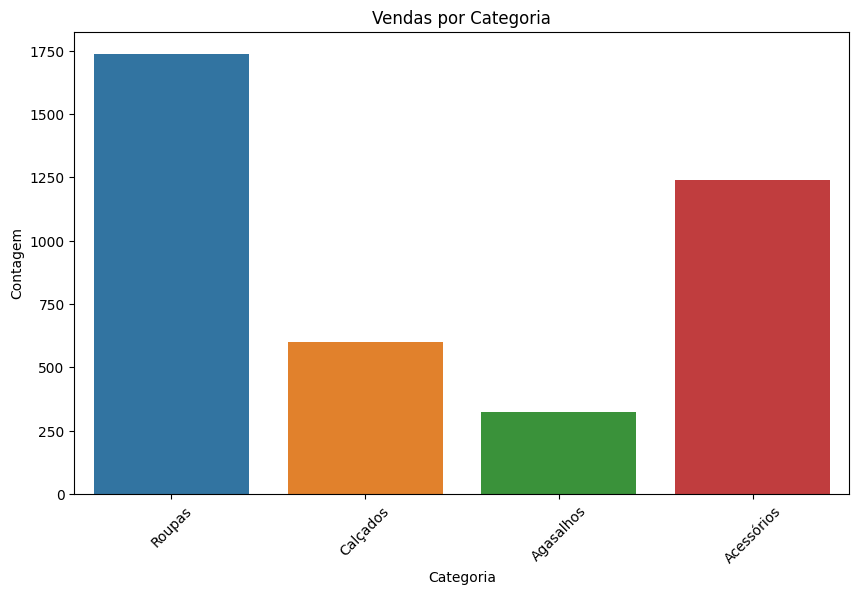

In [ ]:
# Gráficos de vendas por categoria
plt.figure(figsize=(10, 6))
sns.countplot(x='Categoria', data=df)
plt.title('Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

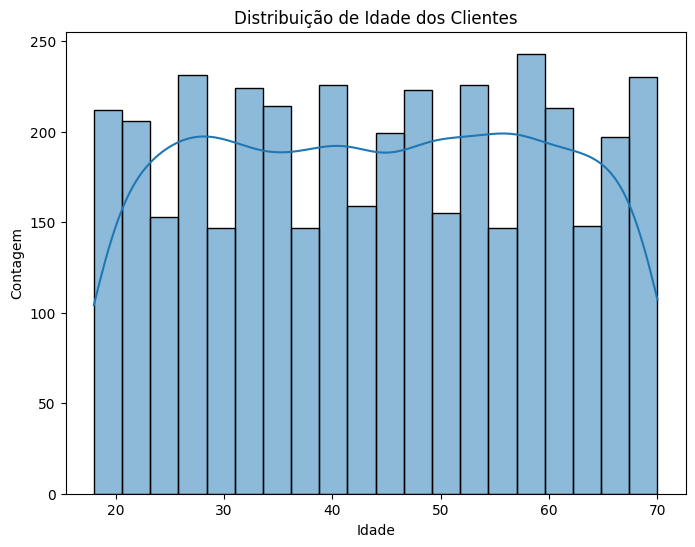

In [ ]:
# Gráficos de vendas por distribuição de idade
plt.figure(figsize=(8, 6))
sns.histplot(df['Idade'], bins=20, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

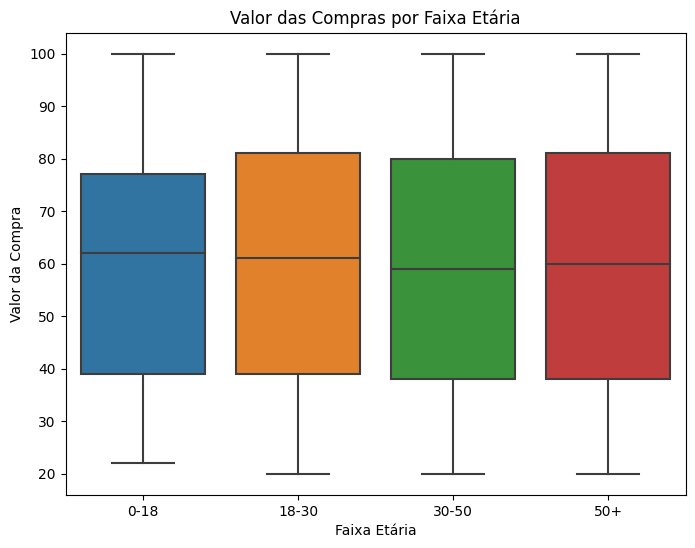

In [ ]:
#Boxplot para Análise do Valor das Compras por Faixa Etária
plt.figure(figsize=(8, 6))
sns.boxplot(x='Faixa Etária', y='Valor Compra', data=df)
plt.title('Valor das Compras por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Compra')
plt.show()

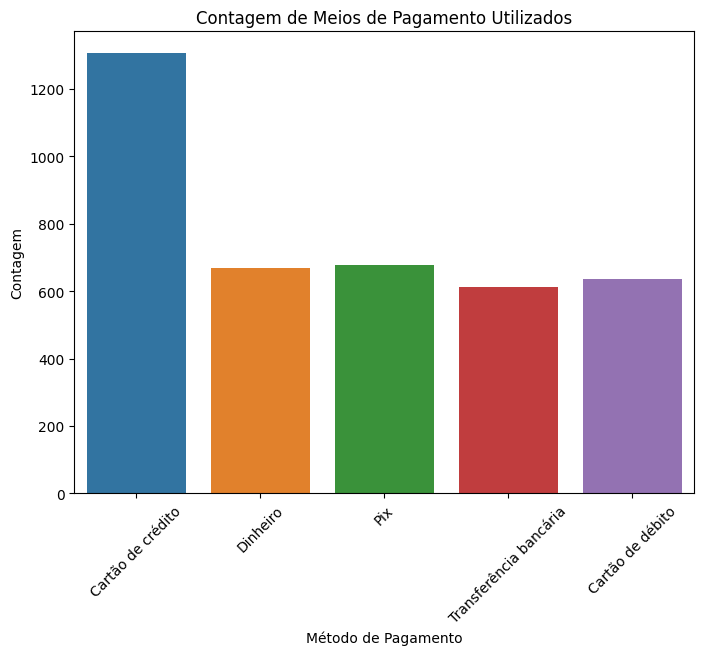

In [ ]:
# Visualização dos Meios de Pagamento Mais Utilizados

plt.figure(figsize=(8, 6))
sns.countplot(x='Método Pagamento', data=df)
plt.title('Contagem de Meios de Pagamento Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x800 with 0 Axes>

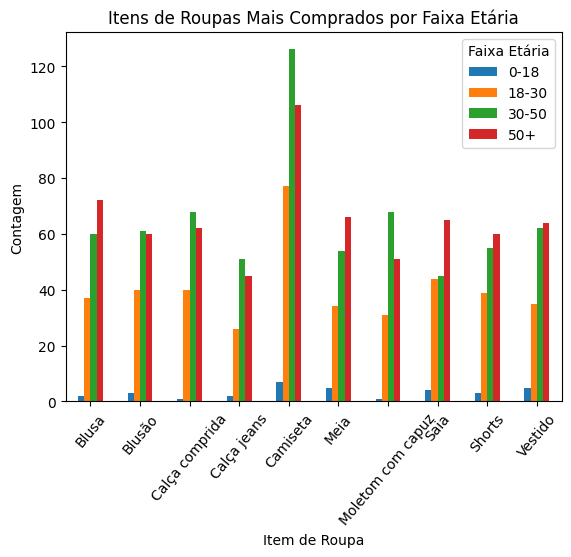

In [ ]:
# Visualização dos Itens de Roupas Mais Comprados por Faixa Etária

plt.figure(figsize=(16, 8))
roupas_faixa = df[df['Categoria'] == 'Roupas'].groupby(['Item Comprado', 'Faixa Etária'])['Item Comprado'].count().unstack()
roupas_faixa.plot(kind='bar')
plt.title('Itens de Roupas Mais Comprados por Faixa Etária')
plt.xlabel('Item de Roupa')
plt.ylabel('Contagem')
plt.xticks(rotation=50)
plt.legend(title='Faixa Etária')
plt.show()


# 6 - Insights e Conclusões

- **Itens mais vendidos e categoria**: As categorias que tiveram mais vendas
foram a de 'Roupas' com 1737 vendas e a categoria de 'Acessórios' com 1240 vendas. Analisando qual item dentro da categoria de Roupa que fez com ela tivesse um maior numero de vendas, percebeu-se a preferencia pelo item 'Camiseta'. Esse produto é o responsável por ter alavancando as vendas.
- **Cidade que Mais Vende:** As 5 cidades com maior volume de vendas são Ceará, Amapá, Alagoas, Amazonas e Rio de Janeiro, sendo um forte indicativo para focar esforços de marketing e logística, bem como estratégias específicas para essas regiês, como promoções locais ou parcerias com empresas locais.
- **Meios de Pagamento Mais Utilizados:** Foi identificado que em todas as faixas etárias o meio de pagamento mais popular foi 'Cartão de Crédito', melhorando a experiência do cliente, oferecendo descontos ou incentivos para outros métodos de pagamento é possível aumentar a conversão de vendas para outros tipos de pagamentos.


